ML analysis for HiggsML challenge

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#Obtain the data dataframe
df = pd.read_csv('../solutions/higgs.csv')

In [18]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [19]:
#Check for missing values
df = df.replace(-999.0, np.nan)
print(df.isnull().sum() / np.size(df, 0) * 100) #Percentage of missing values

EventId                         0.0000
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9828
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num                     0.0000
PRI_jet_leading_pt             39.9652
PRI_jet_leading_eta      

There are several colums with 70% of missing data → Drop them or use KNN imputer 


Let's use a simple median imputer for the remaining missing data

In [20]:
# Calculate missing percentage for each column
missing_pct = df.isnull().mean() * 100

# Drop columns with >=70% missing values, plus non-feature columns
drop_cols = missing_pct[missing_pct >= 70].index.tolist()
drop_cols += ['EventId', 'Weight', 'Label']

#Prepare the data 
X = df.drop(columns=drop_cols).values
y = df['Label'].replace({'s':1, 'b':0}) 

#Simple split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Split the data

#Impute missing values using training data only 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # use training imputer

#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipykernel_20708/3020479823.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Label'].replace({'s':1, 'b':0})


In [21]:
#Model
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

# First hidden layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],))) #Standard number of neurons in the first hidden layer
model.add(Dropout(0.3)) #Deactives 30% of the neurons in order to reduce overfitting

# Second hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Output layer: 1 neuron + sigmoid
model.add(Dense(1, activation='sigmoid'))

/home/morgan/anaconda3/envs/tf_new/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#Compile the model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import metrics

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc')
    ]
)

In [23]:
#Early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [24]:
#Learning rate scheduling
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [25]:
#Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/30
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7961 - auc: 0.8579 - loss: 0.4828 - precision: 0.7287 - recall: 0.6481 - val_accuracy: 0.8233 - val_auc: 0.8911 - val_loss: 0.4169 - val_precision: 0.7692 - val_recall: 0.6982 - learning_rate: 0.0010
Epoch 2/30
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8196 - auc: 0.8828 - loss: 0.4267 - precision: 0.7612 - recall: 0.6927 - val_accuracy: 0.8263 - val_auc: 0.8949 - val_loss: 0.4055 - val_precision: 0.7931 - val_recall: 0.6729 - learning_rate: 0.0010
Epoch 3/30
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8201 - auc: 0.8846 - loss: 0.4211 - precision: 0.7626 - recall: 0.6920 - val_accuracy: 0.8295 - val_auc: 0.8979 - val_loss: 0.3994 - val_precision: 0.7818 - val_recall: 0.7027 - learning_rate: 0.0010
Epoch 4/30
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8214 - auc: 0.8867 - loss: 0.4169 - precision: 0.7651 - recall: 0.6935 - val_accuracy: 0.8273 - val_auc: 0.8948 - val_loss: 

In [26]:
#Evaluate the model
test_loss, test_acc, test_prec, test_rec, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test precision: {test_prec:.3f}")
print(f"Test recall: {test_rec:.3f}")
print(f"Test AUC: {test_auc:.3f}")

Test loss: 0.382
Test accuracy: 0.834
Test precision: 0.777
Test recall: 0.718
Test AUC: 0.902


In [27]:
#Predict
y_pred_prob = model.predict(X_test)         # probabilities between 0 and 1
y_pred = (y_pred_prob > 0.5).astype(int)    # threshold at 0.5

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


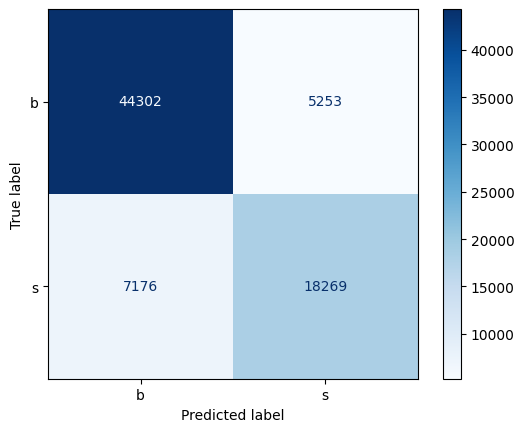

In [28]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['b', 's'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

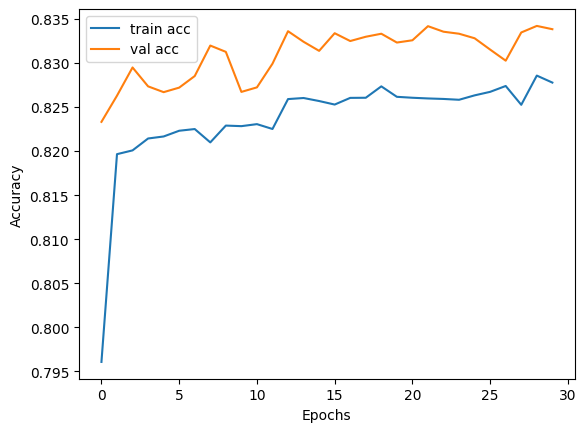

In [29]:
#Plot training curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

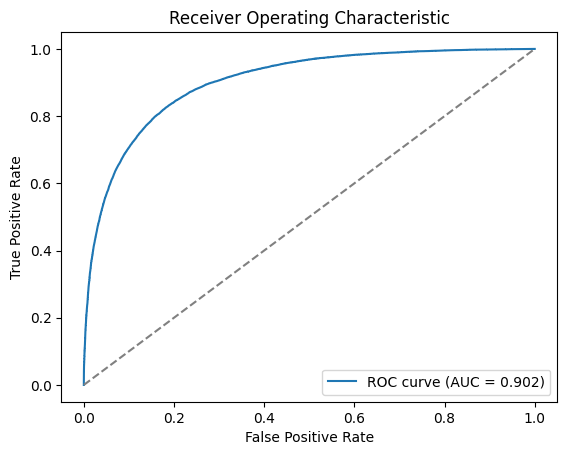

In [30]:
#ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()